In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import qutip
from scipy.linalg import sqrtm

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from povm_clf import *

# <center> Results in manuscript </center>

## 1. One-Qubit POVM

$\hat{\rho} = \frac{1}{2}(I+\vec{a}\cdot\hat{\sigma})$ <br>
$
\mathcal{P} = Tr[\hat{\rho}^2] = \frac{1}{2}(1+|\vec{a}|^2) \Longrightarrow
|\vec{a}| = \sqrt{2\mathcal{P}-1}
$ 

### 1-1. Two States

#### Example 1
$\vec{a}_1 = (\sqrt{2\mathcal{P}-1}, 0, 0)$  
$\vec{a}_2 = (-\sqrt{2\mathcal{P}-1}, 0, 0)$

In [24]:
n_qubit = 3
wires = [0, 1, 2]
n_outcome = 2
devs = [qml.device('default.qubit', wires=n_qubit)] * n_outcome
a_priori_probs = [1/n_outcome] * n_outcome


cost_list, Hbe_list, Hbn_list = [], [], []
ampltd_abs = [1, 0.7, 0.4, 0.1]


steps = [100, 150, 200, 400]
for i, a in enumerate(ampltd_abs):
    
    bloch_vecs = [[a,0,0], [(-1)*a,0,0]]
    # For pure states
    if a == 1:
        classifier = POVM_clf(2, wires[:2], devs[:2], a_priori_probs, bloch_vecs)
        cost_list.append(classifier.run_opt(steps[i]))
        Hbe_list.append(classifier.spectral_decomp())
        Hbn_list.append(classifier.spectral_decomp())
    # For mixed states
    else:
        classifier = POVM_clf(2, wires, devs, a_priori_probs, bloch_vecs)
        Hbe_list.append(classifier.spectral_decomp())
        Hbn_list.append(classifier.spectral_decomp(types='noisy'))

        cost_list.append(classifier.run_opt(steps[i]))

Cost(init_params)    :  0.4926105
Cost after step    20:  0.1054014
Cost after step    40:  0.0015148
Cost after step    60:  0.0000224
Cost after step    80:  0.0000003
Cost after step   100:  0.0000000
* Optimizing for preparing a mixed state ..............................
Target Bloch vector =  [0.7, 0, 0]
Output Bloch vector =  [ 6.98133020e-01  3.93816351e-03 -4.43327885e-04]
* Optimizing for preparing a mixed state ..............................
Target Bloch vector =  [-0.7, 0, 0]
Output Bloch vector =  [-7.02494033e-01 -5.78653097e-04 -3.19792919e-04]
Cost(init_params)    :  0.4948200
Cost after step    20:  0.3397198
Cost after step    40:  0.1632248
Cost after step    60:  0.1505584
Cost after step    80:  0.1498807
Cost after step   100:  0.1498436
Cost after step   120:  0.1498415
Cost after step   140:  0.1498414
* Optimizing for preparing a mixed state ..............................
Target Bloch vector =  [0.4, 0, 0]
Output Bloch vector =  [ 0.40001983 -0.00127305  0.00107

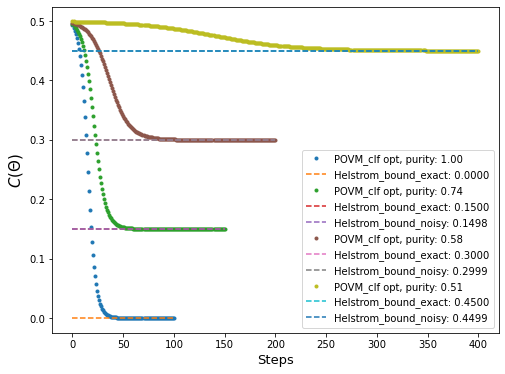

In [25]:
#randmo seed(4)
plt.figure(figsize=(8,6))
for i in range(len(cost_list)):
    plt.plot(list(range(steps[i]+1)), cost_list[i], '.', label="POVM_clf opt, purity:{: .2f}".format((ampltd_abs[i]**2+1)/2))
    plt.plot(list(range(steps[i]+1)), [Hbe_list[i]]*(steps[i]+1), '--', label="Helstrom_bound_exact: {:.4f}".format(Hbe_list[i]))
    if i !=0:
        plt.plot(list(range(steps[i]+1)), [Hbe_list[i]]*(steps[i]+1), '--', label="Helstrom_bound_noisy: {:.4f}".format(Hbn_list[i]))

plt.xlabel('Steps', fontsize=13)
plt.ylabel(r'$C(\Theta)$', fontsize=15)
plt.legend()
plt.savefig('result1.png', bbox_inches='tight', transparent=True)
plt.show()

#### Example 2
$\vec{a}_1 = (\sqrt{2\mathcal{P}-1}, 0, 0)$  
$\vec{a}_2 = (0, 0, \sqrt{2\mathcal{P}-1})$

In [26]:
n_qubit = 3
wires = [0, 1, 2]
n_outcome = 2
devs = [qml.device('default.qubit', wires=n_qubit)] * n_outcome
a_priori_probs = [1/n_outcome] * n_outcome

cost_list, Hbe_list, Hbn_list = [], [], []
purities = [1, 0.85, 0.7, 0.55]


steps = [100, 150, 200, 300]
for i, p in enumerate(purities):
    
    bloch_vecs = [[np.sqrt(2*p-1),0,0], [0,0,np.sqrt(2*p-1)]]
    if p == 1:
        classifier = POVM_clf(2, wires[:2], devs, a_priori_probs, bloch_vecs)
        cost_list.append(classifier.run_opt(steps[i]))
        Hbe_list.append(classifier.spectral_decomp())
        Hbn_list.append(classifier.spectral_decomp())

    else:
        classifier = POVM_clf(2, wires, devs, a_priori_probs, bloch_vecs)
        Hbe_list.append(classifier.spectral_decomp())
        Hbn_list.append(classifier.spectral_decomp(types='noisy'))

        cost_list.append(classifier.run_opt(steps[i]))

Cost(init_params)    :  0.4839589
Cost after step    20:  0.1954287
Cost after step    40:  0.1492356
Cost after step    60:  0.1465955
Cost after step    80:  0.1464545
Cost after step   100:  0.1464470
* Optimizing for preparing a mixed state ..............................
Target Bloch vector =  [0.8366600265340756, 0, 0]
Output Bloch vector =  [8.39014444e-01 3.50771259e-03 6.22793457e-04]
* Optimizing for preparing a mixed state ..............................
Target Bloch vector =  [0, 0, 0.8366600265340756]
Output Bloch vector =  [-5.94857233e-06 -7.53001764e-04  8.36241248e-01]
Cost(init_params)    :  0.4865799
Cost after step    20:  0.2670162
Cost after step    40:  0.2100769
Cost after step    60:  0.2044966
Cost after step    80:  0.2040070
Cost after step   100:  0.2039644
Cost after step   120:  0.2039607
Cost after step   140:  0.2039604
* Optimizing for preparing a mixed state ..............................
Target Bloch vector =  [0.6324555320336758, 0, 0]
Output Bloch ve

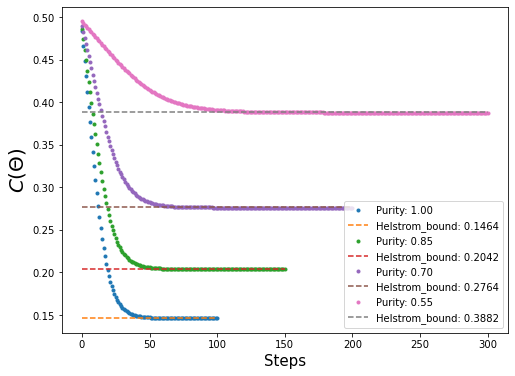

In [27]:
plt.figure(figsize=(8,6))
for i in range(len(cost_list)):
    plt.plot(list(range(steps[i]+1)), cost_list[i], '.', label="Purity:{: .2f}".format((purities[i])))
    plt.plot(list(range(steps[i]+1)), [Hbe_list[i]]*(steps[i]+1), '--', label="Helstrom_bound: {:.4f}".format(Hbe_list[i]))
    #if i !=0:
    #    plt.plot(list(range(steps[i]+1)), [Hbe_list[i]]*(steps[i]+1), '--', label="Helstrom_bound, "+r"$\rho_{noisy}$"+": {:.4f}".format(Hbn_list[i]))

plt.xlabel('Steps', fontsize=15)
plt.ylabel(r'$C(\Theta)$', fontsize=20)
plt.legend()
plt.savefig('result2.png', bbox_inches='tight', transparent=True)
plt.show()

### 1-2. Three States

#### Example 1
$|\psi_0\rangle = \left(|0\rangle + e^{2\pi i /3}|1\rangle\right)/\sqrt{2}$ ===> $\vec{a}_0=\sqrt{2\mathcal{P}-1}(-1/2, \sqrt{3}/2, 0)$<br>
$|\psi_1\rangle = \left(|0\rangle+|1\rangle\right)/\sqrt{2}$       ========> $\vec{a}_1 = \sqrt{2\mathcal{P}-1}(1,0,0) $ <br>
$|\psi_2\rangle = \left(|0\rangle + e^{-2\pi i /3}|1\rangle\right)/\sqrt{2}$ ===> $\vec{a}_2 = \sqrt{2\mathcal{P}-1}(-1/2, -\sqrt{3}/2, 0)$

In [2]:
n_qubit = 4
wires = [0, 1, 2, 3]
n_outcome = 3
devs = [qml.device('default.qubit', wires=n_qubit)] * n_outcome
a_priori_probs = [1/n_outcome] * n_outcome

cost_list = []
cost_pgm_list = []
purities = [1, 0.85, 0.7, 0.55]
steps = [300, 700, 700, 700]

for i, p in enumerate(purities):    
    state_vecs = [[1/np.sqrt(2), np.exp(1j*2*np.pi/3)/np.sqrt(2)], [1/np.sqrt(2), 1/np.sqrt(2)], [1/np.sqrt(2), np.exp(-1j*2*np.pi/3)/np.sqrt(2)]]
    bloch_vecs = [state_2_bloch(state_vecs[i]) for i in range(3)]
    bloch_vecs = [[np.sqrt(2*p-1) * bloch_vecs[n][i] for i in range(3)] for n in range(3)]

    if p == 1:
        classifier =POVM_clf(3, wires[:3], devs, a_priori_probs, bloch_vecs)
        cost_list.append(classifier.run_opt(steps[i]))

    else:
        classifier = POVM_clf(3, wires, devs, a_priori_probs, bloch_vecs)
        cost_list.append(classifier.run_opt(steps[i]))
    
    pgm, cost_pgm = classifier.pgm()
    cost_pgm_list.append(cost_pgm)

Cost(init_params)    :  0.6628988
Cost after step    20:  0.6397759
Cost after step    40:  0.5587298
Cost after step    60:  0.4086230
Cost after step    80:  0.3519525
Cost after step   100:  0.3407429
Cost after step   120:  0.3368609
Cost after step   140:  0.3350475
Cost after step   160:  0.3341766
Cost after step   180:  0.3337553
Cost after step   200:  0.3335478
Cost after step   220:  0.3334435
Cost after step   240:  0.3333904
Cost after step   260:  0.3333630
Cost after step   280:  0.3333488
Cost after step   300:  0.3333414
* Optimizing for preparing a mixed state ..............................
Target Bloch vector =  [-0.4183300132670376, 0.7245688373094721, -1.3454519387485027e-16]
Output Bloch vector =  [-0.41899513  0.72457413 -0.00076244]
* Optimizing for preparing a mixed state ..............................
Target Bloch vector =  [0.8366600265340756, 0.0, -1.3454519387485027e-16]
Output Bloch vector =  [8.35795789e-01 4.77741450e-04 3.30869028e-03]
* Optimizing for 

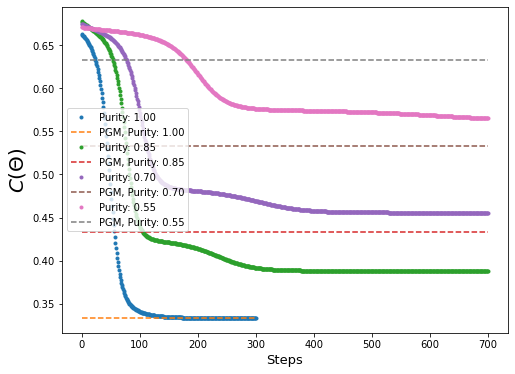

In [3]:
plt.figure(figsize=(8,6))
for i in range(len(cost_list)):
    plt.plot(list(range(steps[i]+1)), cost_list[i], '.', label="Purity:{: .2f}".format((purities[i])))
    #cost_pgm
    plt.plot(list(range(steps[i]+1)), [cost_pgm_list[i]]*(steps[i]+1), '--', label="PGM, Purity:{: .2f}".format((purities[i])))


plt.xlabel('Steps', fontsize=13)
plt.ylabel(r'$C(\Theta)$', fontsize=20)
plt.legend()
#plt.savefig('result3.png', bbox_inches='tight', transparent=True)
plt.show()

In [4]:
[cost_list[i][-1] for i in range(4)]

[0.3333413782065777,
 0.3881141207059602,
 0.4557084397026504,
 0.5650736228999522]

`seed(9)` [0.333336019989774,
 0.38811440103983674,
 0.4557114445909325,
 0.5751731372929737]

`seed(10)`
[0.3334029406865143,
 0.40208094829335383,
 0.45379789753879407,
 0.5611921005937575]

그래프 조금 더 다듬기

#### Example 2
$\vec{a}_0=\sqrt{2\mathcal{P}-1}(1, 0, 0)$<br>
$\vec{a}_1 = \sqrt{2\mathcal{P}-1}(0, 1, 0) $ <br>
$\vec{a}_2 = \sqrt{2\mathcal{P}-1}(0, 0, 1)$

In [4]:
n_qubit = 4
wires = [0, 1, 2, 3]
n_outcome = 3
devs = [qml.device('default.qubit', wires=n_qubit)] * n_outcome
a_priori_probs = [1/n_outcome] * n_outcome

cost_list = []
cost_pgm_list = []
purities = [1, 0.85, 0.7, 0.55]
steps = [300, 400, 400, 600]

for i, p in enumerate(purities):    
    bloch_vecs = [[1,0,0], [0,1,0], [0, 0, 1]]
    bloch_vecs = [[np.sqrt(2*p-1) * bloch_vecs[n][i] for i in range(3)] for n in range(3)]

    if p == 1:
        classifier =POVM_clf(3, wires[:3], devs, a_priori_probs, bloch_vecs)
        cost_list.append(classifier.run_opt(steps[i]))

    else:
        classifier =POVM_clf(3, wires, devs, a_priori_probs, bloch_vecs)
        cost_list.append(classifier.run_opt(steps[i]))
    
    pgm, cost_pgm = classifier.pgm()
    cost_pgm_list.append(cost_pgm)

Cost(init_params)    :  0.6736751
Cost after step    20:  0.6535064
Cost after step    40:  0.6055665
Cost after step    60:  0.4973951
Cost after step    80:  0.4320609
Cost after step   100:  0.4100783
Cost after step   120:  0.4011854
Cost after step   140:  0.3972548
Cost after step   160:  0.3955883
Cost after step   180:  0.3949244
Cost after step   200:  0.3946691
Cost after step   220:  0.3945711
Cost after step   240:  0.3945324
Cost after step   260:  0.3945162
Cost after step   280:  0.3945090
Cost after step   300:  0.3945054
* Optimizing for preparing a mixed state ..............................
Target Bloch vector =  [0.8366600265340756, 0.0, 0.0]
Output Bloch vector =  [ 0.83727665 -0.0027127  -0.00252595]
* Optimizing for preparing a mixed state ..............................
Target Bloch vector =  [0.0, 0.8366600265340756, 0.0]
Output Bloch vector =  [-7.07989662e-04  8.37538164e-01  1.56406598e-03]
* Optimizing for preparing a mixed state .............................

In [12]:
len(cost_list[0])

301

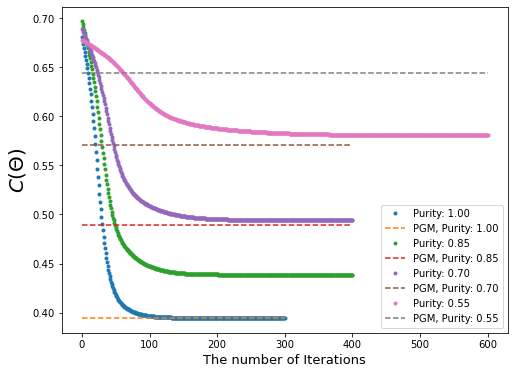

In [30]:
plt.figure(figsize=(8,6))
for i in range(len(cost_list)):
    plt.plot(list(range(steps[i]+1)), cost_list[i], '.', label="Purity:{: .2f}".format((purities[i])))
    #cost_pgm
    plt.plot(list(range(steps[i]+1)), [cost_pgm_list[i]]*(steps[i]+1), '--', label="PGM, Purity:{: .2f}".format((purities[i])))


plt.xlabel('The number of Iterations', fontsize=13)
plt.ylabel("$C(\Theta)$", fontsize=20)
plt.legend()
plt.savefig('result4.png', bbox_inches='tight', transparent=True)
plt.show()

In [79]:
E = classifier.povm()
rho = classifier.density_matrices

In [ ]:
probs_povm[0][0] + q[1] * probs_povm[1][2] + q[2] * probs_povm[2][3]

## 2. Two-Qubit POVM

## 3. Three-element POVMs for Iris Data

---
# CVXPY
---

In [58]:
import cvxpy as cp
import numpy as np